계산 시간: 0.0286 sec


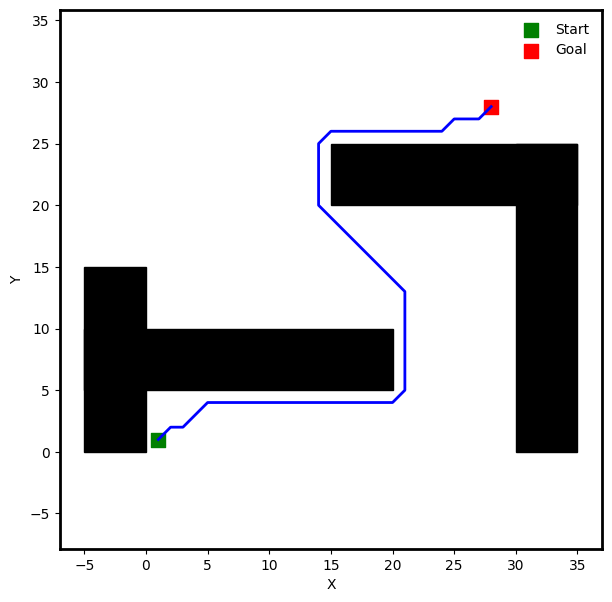

In [14]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import heapq
import time


class PriorityQueue:
    def __init__(self):
        self.q = []

    def put(self, item, priority):
        heapq.heappush(self.q, (priority, item))

    def get(self):
        return heapq.heappop(self.q)[1]

    def empty(self):
        return len(self.q) == 0


def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))


def astar(grid, start, goal):
    h, w = grid.shape
    open_set = PriorityQueue()
    open_set.put(start, 0)

    came_from = {}
    g_score = {start: 0}

    moves = [
        (1,0),(-1,0),(0,1),(0,-1),
        (1,1),(1,-1),(-1,1),(-1,-1)
    ]

    while not open_set.empty():
        current = open_set.get()

        if current == goal:
            break

        for dx, dy in moves:
            nxt = (current[0] + dx, current[1] + dy)

            if not (0 <= nxt[0] < h and 0 <= nxt[1] < w):
                continue
            if grid[nxt] == 1:
                continue

            tentative_g = g_score[current] + heuristic(current, nxt)

            if nxt not in g_score or tentative_g < g_score[nxt]:
                g_score[nxt] = tentative_g
                f = tentative_g + heuristic(nxt, goal)
                open_set.put(nxt, f)
                came_from[nxt] = current

    # 경로 복원
    path = []
    node = goal
    while node in came_from:
        path.append(node)
        node = came_from[node]
    path.append(start)
    return path[::-1]


# ===============================
# Grid 생성
# ===============================

def build_grid(obstacles, x_range, y_range, resolution):
    x_min, x_max = x_range
    y_min, y_max = y_range

    nx = int((x_max - x_min) / resolution)
    ny = int((y_max - y_min) / resolution)

    grid = np.zeros((nx, ny), dtype=np.uint8)

    for obs in obstacles:
        ox1, ox2, oy1, oy2 = obs

        ix1 = int((ox1 - x_min) / resolution)
        ix2 = int((ox2 - x_min) / resolution)
        iy1 = int((oy1 - y_min) / resolution)
        iy2 = int((oy2 - y_min) / resolution)

        ix1 = max(0, ix1)
        iy1 = max(0, iy1)
        ix2 = min(nx-1, ix2)
        iy2 = min(ny-1, iy2)

        grid[ix1:ix2+1, iy1:iy2+1] = 1

    return grid


# ===============================
# 플롯: 정상 좌표 버전
# ===============================

def plot_result(obstacles, start, goal, path, resolution, x_range, y_range):
    fig, ax = plt.subplots(figsize=(7,7))

    # 장애물 (x,y 순)
    for obs in obstacles:
        x1, x2, y1, y2 = obs
        rect = Rectangle((x1, y1), (x2 - x1), (y2 - y1), color="black", alpha=1)
        ax.add_patch(rect)

    # 경로 (x,y 순)
    if len(path) > 1:
        px = [x_range[0] + p[0]*resolution for p in path]
        py = [y_range[0] + p[1]*resolution for p in path]
        plt.plot(px, py, linewidth=2,c='blue')

    plt.scatter([start[0]], [start[1]], c="green",marker='s', label="Start", s= 100)
    plt.scatter([goal[0]], [goal[1]], c="red", marker='s', label="Goal", s = 100)

    for spine in ax.spines.values():
        spine.set_linewidth(2)

    plt.xlabel("X")
    plt.ylabel("Y")
    #plt.title(f"A* Pathfinding (resolution={resolution})")
    plt.legend(frameon=False)
    plt.grid(False)
    plt.axis("equal")
    plt.show()



# ===============================
# 실행 파트
# ===============================

if __name__ == "__main__":

    start = np.array([1.0, 1.0], dtype=np.float32)
    goal  = np.array([28.0, 28.0], dtype=np.float32)

    obstacles = np.array([
        [-5, 20, 5, 10],
        [-5,  0, 0, 15],
        [15, 35, 20, 25],
        [30, 35,  0, 25]
    ], dtype=np.float32)

    resolution = 1  # 조절 가능

    x_range = (min(start[0], goal[0]) - 5, max(start[0], goal[0]) + 5)
    y_range = (min(start[1], goal[1]) - 5, max(start[1], goal[1]) + 5)

    grid = build_grid(obstacles, x_range, y_range, resolution)

    s = (
        int((start[0] - x_range[0]) / resolution),
        int((start[1] - y_range[0]) / resolution)
    )

    g = (
        int((goal[0] - x_range[0]) / resolution),
        int((goal[1] - y_range[0]) / resolution)
    )

    t0 = time.time()
    path = astar(grid, s, g)
    t1 = time.time()

    print(f"Calculation Time: {t1 - t0:.4f} sec")
    plot_result(obstacles, start, goal, path, resolution, x_range, y_range)
